In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
#Reading .csv files

anime_df = pd.read_csv('/Users/aishwarya/Downloads/anime.csv')
rating_df = pd.read_csv('/Users/aishwarya/Downloads/rating.csv')

In [3]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
df = pd.merge(rating_df,anime_df.drop('rating',axis=1),on='anime_id')

In [6]:
df.head()

,user_id,anime_id,rating,name,genre,type,episodes,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297


user_id     73515
anime_id    11197
rating         11
name        11196
genre        3154
type            6
episodes      184
members      6487
dtype: int64


<AxesSubplot:>

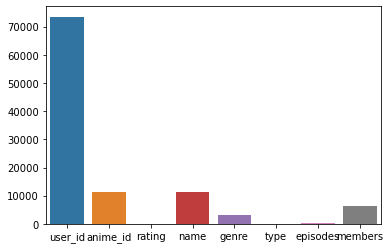

In [7]:
print(df.nunique(axis=0))
sns.barplot(x = df.columns, y = df.nunique(axis=0))

In [8]:
#Spliting data into train and test data set

train, test = train_test_split(df, test_size=0.2, random_state=42)

train.head()

,user_id,anime_id,rating,name,genre,type,episodes,members
4465822,70390,23283,8,Zankyou no Terror,"Psychological, Thriller",TV,11,342893
4180496,38431,4182,7,Darker than Black: Kuro no Keiyakusha Special,"Comedy, Parody, Sci-Fi",Special,1,87609
1552972,42171,22729,10,Aldnoah.Zero,"Action, Mecha, Sci-Fi",TV,12,244193
2653132,8175,10521,9,Working&#039;!!,"Comedy, Slice of Life",TV,13,117328
2793500,69541,13851,10,To LOVE-Ru Darkness OVA,"Comedy, Ecchi, Harem, Romance, School, Sci-Fi,...",OVA,6,57166


In [9]:
test.head()

,user_id,anime_id,rating,name,genre,type,episodes,members
2375120,6155,5081,7,Bakemonogatari,"Mystery, Romance, Supernatural, Vampire",TV,15,482268
3188893,67150,59,7,Chobits,"Comedy, Drama, Ecchi, Romance, Sci-Fi, Seinen",TV,26,266846
4769282,19614,7311,9,Suzumiya Haruhi no Shoushitsu,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...",Movie,1,240297
6887031,38937,158,7,Maria-sama ga Miteru,"Drama, Romance, Shoujo, Shoujo Ai, Slice of Life",TV,13,33989
1397707,27133,9989,8,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...,"Drama, Slice of Life, Supernatural",TV,11,463835


In [10]:
finalRating = pd.DataFrame(df.groupby('name')['rating'].mean())
finalRating['totalRating'] = pd.DataFrame(df.groupby('name')['rating'].count())
finalRating.head()

,rating,totalRating
name,,
&quot;0&quot;,2.769231,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.000000,2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,5.774936,782
&quot;Bungaku Shoujo&quot; Memoire,6.155748,809
&quot;Bungaku Shoujo&quot; Movie,6.457980,1535


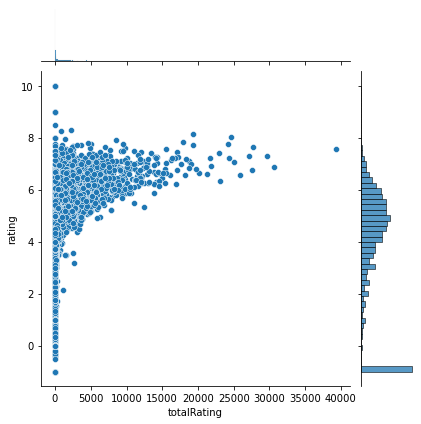

In [11]:
#Plotting the rating and total rating from the dfRating

sns.jointplot(x='totalRating',y='rating',data=finalRating,alpha=1)

In [12]:
#Creating the pivot table for reorganizing the data and summarizing the rating of anime for each user.

animePivot = df.pivot_table(index='name',columns='user_id',values='rating').fillna(0)


In [13]:
animePivot

user_id,1,2,3,4,5,6,7,8,9,10,...,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xxxHOLiC Kei,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xxxHOLiC Movie: Manatsu no Yoru no Yume,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xxxHOLiC Rou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Defining the KNN model with sparse matrix and brute algorithm.

sparseAnime=csr_matrix(animePivot)
model=NearestNeighbors(algorithm='brute')
model.fit(sparseAnime)

NearestNeighbors(algorithm='brute')

In [15]:
#Defining the recommendation system method and course name as parameter.

def animeRecommendation(name):
    try:
        user_id=np.where(animePivot.index.str.lower()==name.lower())[0][0]
        distances, suggestions=model.kneighbors(animePivot.iloc[user_id,:].values.reshape(1,-1), n_neighbors=5)
        
        for i in range(len(suggestions)):
            print("Some recommendations for", name,"are:")
            print(animePivot.index[suggestions[i]])
    except:
        print("Sorry! couldn't find recommendation for the anime:",name)

In [16]:
finalRating.sort_values('totalRating',ascending=False).head(30)

,rating,totalRating
name,,
Death Note,7.556177,39340
Sword Art Online,6.863159,30583
Shingeki no Kyojin,7.314089,29584
Code Geass: Hangyaku no Lelouch,7.641244,27718
Elfen Lied,6.753508,27506
Angel Beats!,7.278667,27183
Naruto,6.571726,25925
Fullmetal Alchemist,7.056048,25032
Fullmetal Alchemist: Brotherhood,8.028933,24574


In [17]:
#Taking user input for anime recommendation.

chooseAnime = input("Enter one anime: ")
print ('Selected anime:', chooseAnime)

Enter one anime: Naruto
Selected anime: Naruto


In [18]:
#Calling the recommendation method with user input

animeRecommendation(chooseAnime)

Some recommendations for Naruto are:
Index(['Naruto',
       'Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!',
       'Naruto: Shippuuden Movie 1',
       'Naruto Movie 2: Dai Gekitotsu! Maboroshi no Chiteiiseki Dattebayo!',
       'Naruto: Shippuuden Movie 2 - Kizuna'],
      dtype='object', name='name')


In [ ]:
# Make recommendations for users in the test set and calculate accuracy metrics

def evaluate_recommendations(test_data):
    predicted_ratings = []
    actual_ratings = []

    for user_id in test_data['user_id'].unique():
        user_data = test_data[test_data['user_id'] == user_id]
        for _, row in user_data.iterrows():
       ==     recommendations = animeRecommendation(row['name'])
            actual_rating = row['rating']
            if recommendations:
                predicted_rating = animePivot.loc[recommendations[0], user_id]
                predicted_ratings.append(predicted_rating)
                actual_ratings.append(actual_rating)

    # Calculate accuracy metrics
    mae = mean_absolute_error(actual_ratings, predicted_ratings)
    mse = mean_squared_error(actual_ratings, predicted_ratings)

    return mae, mse

# Evaluate recommendations on the test set
mae, mse = evaluate_recommendations(test)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Some recommendations for Bakemonogatari are:
Index(['Bakemonogatari', 'Nisemonogatari', 'Nekomonogatari: Kuro',
       'Monogatari Series: Second Season', 'Hanamonogatari'],
      dtype='object', name='name')
Some recommendations for Neo Angelique Abyss are:
Index(['Neo Angelique Abyss', 'Neo Angelique Abyss: Second Age',
       'Koisuru Tenshi Angelique: Kokoro no Mezameru Toki',
       'Koisuru Tenshi Angelique: Kagayaki no Ashita',
       'Koisuru Tenshi Angelique: Kagayaki no Ashita Special'],
      dtype='object', name='name')
Some recommendations for Fullmetal Alchemist: Brotherhood are:
Index(['Fullmetal Alchemist: Brotherhood', 'Fullmetal Alchemist', 'Fate/Zero',
       'Fate/Zero 2nd Season', 'Steins;Gate'],
      dtype='object', name='name')
Some recommendations for Juuni Kokuki are:
Index(['Juuni Kokuki', 'Fight!!', 'Genma Taisen: Shinwa Zenya no Shou',
       'Yawara! Special: Zutto Kimi no Koto ga... .', 'Urarochi Diamond'],
      dtype='object', name='name')
Some recommen

Some recommendations for Sen to Chihiro no Kamikakushi are:
Index(['Sen to Chihiro no Kamikakushi', 'Howl no Ugoku Shiro', 'Mononoke Hime',
       'Tonari no Totoro', 'Majo no Takkyuubin'],
      dtype='object', name='name')
Some recommendations for Ayashi no Ceres are:
Index(['Ayashi no Ceres', 'Koisuru Tenshi Angelique: Kokoro no Mezameru Toki',
       'Harukanaru Toki no Naka de 3: Kurenai no Tsuki',
       'Harukanaru Toki no Naka de 3: Owarinaki Unmei', 'Handsome Girl'],
      dtype='object', name='name')
Some recommendations for Kyou kara Maou! R are:
Index(['Kyou kara Maou! R', 'Kyou kara Maou! 3rd Series',
       'Battle Spirits: Sword Eyes Gekitouden',
       'Yonimo Osoroshii Nihon Mukashibanashi',
       'Tenshi na Konamaiki Specials'],
      dtype='object', name='name')
Some recommendations for Cardcaptor Sakura Movie 2: Fuuin Sareta Card are:
Index(['Cardcaptor Sakura Movie 2: Fuuin Sareta Card',
       'Cardcaptor Sakura Movie 1', 'Cardcaptor Sakura: Leave It to Kero-chan

Some recommendations for Beck are:
Index(['Beck', 'Kachou Ouji', 'Buzzer Beater', 'Hataraki Man',
       'Tokyo Tribe 2'],
      dtype='object', name='name')
Some recommendations for Suzumiya Haruhi no Shoushitsu are:
Index(['Suzumiya Haruhi no Shoushitsu', 'Suzumiya Haruhi no Yuuutsu (2009)',
       'Suzumiya Haruhi-chan no Yuuutsu', 'Nagato Yuki-chan no Shoushitsu',
       'Toaru Kagaku no Railgun: Misaka-san wa Ima Chuumoku no Mato desukara'],
      dtype='object', name='name')
Some recommendations for Toaru Majutsu no Index-tan are:
Index(['Toaru Majutsu no Index-tan', 'Toaru Majutsu no Index-tan II',
       'Toaru Kagaku no Railgun: Motto Marutto Railgun',
       'Toaru Kagaku no Railgun: Entenka no Satsuei Model mo Raku Ja Arimasen wa ne.',
       'Toaru Majutsu no Index: Endymion no Kiseki Special'],
      dtype='object', name='name')
Some recommendations for Date A Live II are:
Index(['Date A Live II', 'Date A Live: Date to Date',
       'Date A Live: Encore OVA', 'Date A Live'

Some recommendations for Rosario to Vampire are:
Index(['Rosario to Vampire', 'Rosario to Vampire Capu2', 'Sekirei', 'Kanokon',
       'Omamori Himari'],
      dtype='object', name='name')
Some recommendations for Tokyo Ghoul are:
Index(['Tokyo Ghoul', 'Tokyo Ghoul √A', 'Akame ga Kill!',
       'Kiseijuu: Sei no Kakuritsu', 'Owari no Seraph'],
      dtype='object', name='name')
Some recommendations for Maria-sama ga Miteru are:
Index(['Maria-sama ga Miteru', 'Maria-sama ga Miteru: Haru',
       'Maria-sama ga Miteru 3rd', 'Maria-sama ga Miteru 4th',
       'Maria-sama ga Miteru Specials'],
      dtype='object', name='name')
Some recommendations for The iDOLM@STER: 765 Pro to Iu Monogatari are:
Index(['The iDOLM@STER: 765 Pro to Iu Monogatari',
       'The iDOLM@STER Shiny Festa', 'Puchimas!: Petit iDOLM@STER Episode 0',
       'The iDOLM@STER Movie: Kagayaki no Mukougawa e!',
       'The iDOLM@STER Live For You!'],
      dtype='object', name='name')
Some recommendations for Fudanshi Ko

Some recommendations for Danna ga Nani wo Itteiru ka Wakaranai Ken are:
Index(['Danna ga Nani wo Itteiru ka Wakaranai Ken',
       'Danna ga Nani wo Itteiru ka Wakaranai Ken 2 Sure-me',
       'Denki-gai no Honya-san', 'Komori-san wa Kotowarenai!', 'Military!'],
      dtype='object', name='name')
Some recommendations for Puchimas!: Petit iDOLM@STER are:
Index(['Puchimas!: Petit iDOLM@STER', 'Puchimas!!: Petit Petit iDOLM@STER',
       'Puchimas!: Petit iDOLM@STER Episode 0',
       'Puchimas!: Petit iDOLM@STER - Takatsuki Gold Densetsu Special!! Haruka-san Matsuri',
       'Puchimas!!: Petit Petit iDOLM@STER - Fuyu→Kotatsu←Haru'],
      dtype='object', name='name')
Some recommendations for Gokujou Seitokai are:
Index(['Gokujou Seitokai', 'Sugar Bunnies', 'Funny Pets',
       'NG Knight Ramune &amp; 40 EX: Biku Biku Triangle Ai no Arashi Daisakusen',
       'Dr. Slump: Arale-chan Penguin Mura Eiyuu Densetsu'],
      dtype='object', name='name')
Some recommendations for Senki Zesshou Sym

Some recommendations for Shoujo Kakumei Utena: Adolescence Mokushiroku are:
Index(['Shoujo Kakumei Utena: Adolescence Mokushiroku', 'Idol Project',
       'Ginga Tetsudou 999: Eien no Tabibito Emeraldas',
       'Harbor Light Monogatari: Fashion Lala yori', 'Peeping Life Specials'],
      dtype='object', name='name')
Some recommendations for AIKa Zero Picture Drama are:
Index(['AIKa Zero Picture Drama', 'Doll Saaya',
       'The Kabocha Wine: Nita no Aijou Monogatari', '12-sai. 2nd Season',
       'Suishou no Yoru: Aoi Kokuhaku yori'],
      dtype='object', name='name')
Some recommendations for Xenosaga The Animation are:
Index(['Xenosaga The Animation', 'Happy Kappy Recap', 'Ys IV: The Dawn of Ys',
       'Naikaku Kenryoku Hanzai Kyousei Torishimarikan Zaizen Joutarou',
       'Puttsun Make Love'],
      dtype='object', name='name')
Some recommendations for Senki Zesshou Symphogear: Meteoroid-Falling, Burning, and Disappear, Then... are:
Index(['Senki Zesshou Symphogear: Meteoroid-Fal

Some recommendations for Boku wa Tomodachi ga Sukunai Episode 0 are:
Index(['Boku wa Tomodachi ga Sukunai Episode 0',
       'Boku wa Tomodachi ga Sukunai: Relay Shousetsu wa Ketsumatsu ga Hanpanai',
       'Haiyoru! Nyaruani: Remember My Love(craft-sensei) Special', 'R-15 OVA',
       'Princess Lover!: Magical Knight Maria-chan'],
      dtype='object', name='name')
Some recommendations for Zero no Tsukaima are:
Index(['Zero no Tsukaima', 'Zero no Tsukaima: Futatsuki no Kishi',
       'Zero no Tsukaima: Princesses no Rondo', 'Zero no Tsukaima F',
       'Shakugan no Shana II (Second)'],
      dtype='object', name='name')
Some recommendations for Yuyushiki are:
Index(['Yuyushiki', 'Yuyushiki: Nyanyashiki', 'Usakame',
       'Hidamari Sketch: Sae Hiro Sotsugyou-hen', 'Teekyuu 7'],
      dtype='object', name='name')
Some recommendations for Lovely★Complex are:
Index(['Lovely★Complex', 'Bokura ga Ita', 'Itazura na Kiss', 'Peach Girl',
       'Hiyokoi'],
      dtype='object', name='name')
S

Some recommendations for Zombie-Loan are:
Index(['Zombie-Loan', 'Zombie-Loan Specials', 'Legend of Duo',
       'Miracle Train: Chuo-sen e Youkoso',
       'Saint Beast: Ikusen no Hiru to Yoru-hen'],
      dtype='object', name='name')
Some recommendations for Kämpfer für die Liebe are:
Index(['Kämpfer für die Liebe', 'Kämpfer Picture Drama',
       'Prism Magical: Prism Generations!',
       'Hyakka Ryouran: Samurai After Specials', 'Rio: Rainbow Gate! Special'],
      dtype='object', name='name')
Some recommendations for Suisei no Gargantia are:
Index(['Suisei no Gargantia', 'Suisei no Gargantia Specials',
       'Kakumeiki Valvrave', 'Kakumeiki Valvrave 2nd Season',
       'Ginga Kikoutai Majestic Prince'],
      dtype='object', name='name')
Some recommendations for Fate/stay night: Unlimited Blade Works 2nd Season are:
Index(['Fate/stay night: Unlimited Blade Works 2nd Season',
       'Fate/stay night: Unlimited Blade Works',
       'Fate/stay night: Unlimited Blade Works - Prologue

Some recommendations for School Days: Magical Heart Kokoro-chan are:
Index(['School Days: Magical Heart Kokoro-chan', 'School Days: Valentine Days',
       'School Days ONA', 'Moonlight Sonata', 'Soul Link Picture Drama'],
      dtype='object', name='name')
Some recommendations for Hitsugi no Chaika OVA are:
Index(['Hitsugi no Chaika OVA',
       'Rolling☆Girls: Chibi☆Rolling☆Girls Korokoro Gekijou',
       'Mahou Shoujo? Naria☆Girls',
       'Senki Zesshou Symphogear GX: Believe in Justice and Hold a Determination to Fist. Specials',
       'Watashitachi, Luck Logic-bu!'],
      dtype='object', name='name')
Some recommendations for Evangelion: 2.0 You Can (Not) Advance are:
Index(['Evangelion: 2.0 You Can (Not) Advance',
       'Evangelion: 1.0 You Are (Not) Alone',
       'Evangelion: 3.0 You Can (Not) Redo',
       'Neon Genesis Evangelion: Death &amp; Rebirth',
       'Neon Genesis Evangelion: The End of Evangelion'],
      dtype='object', name='name')
Some recommendations for Ore 

Some recommendations for Durarara!!x2 Ten are:
Index(['Durarara!!x2 Ten', 'Durarara!!x2 Ketsu', 'Durarara!!x2 Shou',
       'Durarara!!x2 Shou: Watashi no Kokoro wa Nabe Moyou',
       'Durarara!!x2 Ten: Onoroke Chakapoko'],
      dtype='object', name='name')
Some recommendations for Carnival Phantasm: HibiChika Special are:
Index(['Carnival Phantasm: HibiChika Special', 'Carnival Phantasm: Illya-jou',
       'Jigoku Youchien', 'Okitegami Kyouko no Bibouroku x Monogatari',
       'Nekogami Yaoyorozu Specials'],
      dtype='object', name='name')
Some recommendations for Nisekoi: are:
Index(['Nisekoi:', 'Nisekoi OVA',
       'Ore ga Ojousama Gakkou ni &quot;Shomin Sample&quot; Toshite Gets♥Sareta Ken',
       'Okusama ga Seitokaichou!', 'Jitsu wa Watashi wa'],
      dtype='object', name='name')
Some recommendations for Absolute Duo are:
Index(['Absolute Duo', 'Seiken Tsukai no World Break', 'Juuou Mujin no Fafnir',
       'Isuca', 'Kuusen Madoushi Kouhosei no Kyoukan'],
      dtype='obj

Some recommendations for Yu☆Gi☆Oh!: Hikari no Pyramid are:
Index(['Yu☆Gi☆Oh!: Hikari no Pyramid',
       'Yu☆Gi☆Oh! Duel Monsters: Battle City Special',
       'Yu☆Gi☆Oh!: Chou Yuugou! Toki wo Koeta Kizuna',
       'Yu☆Gi☆Oh! 5D&#039;s: Shinkasuru Kettou! Stardust vs. Red Demon&#039;s',
       'Yu☆Gi☆Oh! Zexal Special'],
      dtype='object', name='name')
Some recommendations for One Piece Movie 4: Dead End no Bouken are:
Index(['One Piece Movie 4: Dead End no Bouken',
       'One Piece Movie 5: Norowareta Seiken',
       'One Piece Movie 3: Chinjuu-jima no Chopper Oukoku',
       'One Piece Movie 7: Karakuri-jou no Mecha Kyohei',
       'One Piece Movie 2: Nejimaki-jima no Daibouken'],
      dtype='object', name='name')
Some recommendations for Hyakka Ryouran: Samurai Bride are:
Index(['Hyakka Ryouran: Samurai Bride',
       'Hyakka Ryouran: Samurai Bride Specials',
       'Hyakka Ryouran: Samurai After',
       'Hyakka Ryouran: Samurai After Specials',
       'Hyakka Ryouran: Samurai

Some recommendations for Ichiban Ushiro no Daimaou Specials are:
Index(['Ichiban Ushiro no Daimaou Specials',
       'Shukufuku no Campanella Specials', 'Koi Koi 7 Specials',
       'Sacred Seven: Shirogane no Tsubasa Picture Drama',
       'Erementar Gerad: Aozora no Senki'],
      dtype='object', name='name')
Some recommendations for Danshi Koukousei no Nichijou Specials are:
Index(['Danshi Koukousei no Nichijou Specials',
       'Thermae Romae x Yoyogi Animation Gakuin Collaboration',
       'Yurumates 3D: Ushinawareta Genjitsu', 'Yurumates wa?',
       'SKET Dance: Demystifying Special'],
      dtype='object', name='name')
Some recommendations for Asura Cryin&#039; are:
Index(['Asura Cryin&#039;', 'Asura Cryin&#039; 2',
       'Shinkyoku Soukai Polyphonica Crimson S', 'Arad Senki: Slap Up Party',
       'Gin&#039;iro no Olynsis: Tokito'],
      dtype='object', name='name')
Some recommendations for D-Frag! are:
Index(['D-Frag!', 'D-Frag! OVA', 'Nourin', 'Rokujouma no Shinryakusha!? 

Some recommendations for Hidan no Aria AA are:
Index(['Hidan no Aria AA', 'Watashitachi, Luck Logic-bu!',
       'Regalia: The Three Sacred Stars',
       'Kaitou Tenshi Twin Angel: Kyun Kyun☆Tokimeki Paradise!! OVA',
       'Nyamen'],
      dtype='object', name='name')
Some recommendations for Fullmetal Alchemist: The Sacred Star of Milos are:
Index(['Fullmetal Alchemist: The Sacred Star of Milos',
       'Fullmetal Alchemist: The Sacred Star of Milos Specials',
       'Fullmetal Alchemist: Brotherhood - 4-Koma Theater', 'Just Awake',
       'Green Dakara x Bakemono no Ko'],
      dtype='object', name='name')
Some recommendations for Tokyo Ghoul are:
Index(['Tokyo Ghoul', 'Tokyo Ghoul √A', 'Akame ga Kill!',
       'Kiseijuu: Sei no Kakuritsu', 'Owari no Seraph'],
      dtype='object', name='name')
Some recommendations for Freezing are:
Index(['Freezing', 'Freezing Vibration', 'Freezing Specials', 'Maken-Ki!',
       'Hyakka Ryouran: Samurai Girls'],
      dtype='object', name='name')


Some recommendations for Tsuritama are:
Index(['Tsuritama', 'Shiranpuri (Movie)',
       'Shounen Hollywood: Holly Stage for 50', 'PES: Peace Eco Smile',
       'Jigoku Youchien'],
      dtype='object', name='name')
Some recommendations for Ookami Kodomo no Ame to Yuki are:
Index(['Ookami Kodomo no Ame to Yuki', 'Coquelicot-zaka kara', 'Hal',
       'Momo e no Tegami', 'Bakemono no Ko'],
      dtype='object', name='name')
Some recommendations for Kara no Kyoukai 3: Tsuukaku Zanryuu are:
Index(['Kara no Kyoukai 3: Tsuukaku Zanryuu',
       'Kara no Kyoukai 4: Garan no Dou',
       'Kara no Kyoukai 2: Satsujin Kousatsu (Zen)',
       'Kara no Kyoukai 5: Mujun Rasen', 'Kara no Kyoukai 6: Boukyaku Rokuon'],
      dtype='object', name='name')
Some recommendations for Cowboy Bebop are:
Index(['Cowboy Bebop', 'Cowboy Bebop: Tengoku no Tobira', 'Trigun',
       'Samurai Champloo', 'Ghost in the Shell: Stand Alone Complex'],
      dtype='object', name='name')
Some recommendations for Hachimitsu

Some recommendations for Bounen no Xamdou are:
Index(['Bounen no Xamdou', 'Kenran Butou Sai: The Mars Daybreak',
       'Gin&#039;iro no Olynsis: Tokito',
       'Mahou Shoujo-tai Arusu the Adventure', 'Rean no Tsubasa'],
      dtype='object', name='name')
Some recommendations for Minami-ke are:
Index(['Minami-ke', 'Minami-ke Okawari', 'Minami-ke Okaeri',
       'Minami-ke Betsubara', 'Minami-ke Tadaima'],
      dtype='object', name='name')
Some recommendations for Shiki are:
Index(['Shiki', 'Shiki Specials', 'Ookamikakushi', 'Mouryou no Hako', 'Pupa'], dtype='object', name='name')
Some recommendations for Natsume Yuujinchou are:
Index(['Natsume Yuujinchou', 'Zoku Natsume Yuujinchou',
       'Natsume Yuujinchou San', 'Natsume Yuujinchou Shi',
       'Natsume Yuujinchou: Itsuka Yuki no Hi ni'],
      dtype='object', name='name')
Some recommendations for Code Geass: Hangyaku no Lelouch R2 are:
Index(['Code Geass: Hangyaku no Lelouch R2', 'Code Geass: Hangyaku no Lelouch',
       'Darker 

Some recommendations for Sensitive Pornograph are:
Index(['Sensitive Pornograph', 'Enzai', 'Boku no Sexual Harassment',
       'Keiraku no Houteishiki Level-C', 'Saigo no Door wo Shimero!'],
      dtype='object', name='name')
Some recommendations for Lesson XX are:
Index(['Lesson XX',
       'Kaiketsu Zorori: Mahoutsukai no Deshi/Dai Kaizoku no Takara Sagashi',
       'Touyama Sakura Uchuu Chou: Yatsu no Na wa Gold',
       'Shin Karate Jigoku-hen', 'Funny Pets 2nd Season'],
      dtype='object', name='name')
Some recommendations for Samurai Champloo are:
Index(['Samurai Champloo', 'Samurai 7', 'Afro Samurai',
       'Cowboy Bebop: Tengoku no Tobira', 'Gungrave'],
      dtype='object', name='name')
Some recommendations for Saigo no Door wo Shimero! are:
Index(['Saigo no Door wo Shimero!', 'Seikimatsu★Darling',
       'Boku wa Konomama Kaeranai', 'Osakana wa Ami no Naka', 'Lesson XX'],
      dtype='object', name='name')
Some recommendations for Digimon Adventure Movie are:
Index(['Digim

Some recommendations for Kannagi are:
Index(['Kannagi', 'Kannagi: Moshimo Kannagi ga Attara...', 'Hyakko',
       'Kyou no 5 no 2 (TV)', 'Natsu no Arashi!'],
      dtype='object', name='name')
Some recommendations for World Destruction: Sekai Bokumetsu no Rokunin are:
Index(['World Destruction: Sekai Bokumetsu no Rokunin', 'Ore-sama Kingdom',
       'Battle Spirits: Sword Eyes Gekitouden', 'Kremlin',
       'Wangpai Yushi Di 0 Ji'],
      dtype='object', name='name')
Some recommendations for Kyoukaisenjou no Horizon II are:
Index(['Kyoukaisenjou no Horizon II', 'Kyoukaisenjou no Horizon',
       'Sengoku Collection', 'Kyoukaisenjou no Horizon Specials',
       'Owari no Chronicle'],
      dtype='object', name='name')
Some recommendations for Yoake Mae yori Ruriiro na: Crescent Love are:
Index(['Yoake Mae yori Ruriiro na: Crescent Love',
       'Tsuki wa Higashi ni Hi wa Nishi ni: Operation Sanctuary',
       'Wind: A Breath of Heart Specials', 'Wind: A Breath of Heart',
       'Gin&#03

Some recommendations for Hentai Ouji to Warawanai Neko. are:
Index(['Hentai Ouji to Warawanai Neko.',
       'Ore no Kanojo to Osananajimi ga Shuraba Sugiru',
       'Oniichan dakedo Ai Sae Areba Kankeinai yo ne!',
       'Haiyore! Nyaruko-san W', 'Kono Naka ni Hitori, Imouto ga Iru!'],
      dtype='object', name='name')
Some recommendations for Medaka Box Abnormal are:
Index(['Medaka Box Abnormal', 'Medaka Box', 'Sengoku Collection',
       'Ebiten: Kouritsu Ebisugawa Koukou Tenmonbu',
       'Ebiten: Kouritsu Ebisugawa Koukou Tenmonbu OVA'],
      dtype='object', name='name')
Some recommendations for Sengoku Basara Two are:
Index(['Sengoku Basara Two', 'Sengoku Basara Movie: The Last Party',
       'Sengoku Basara: Setonai no Gekitotsu! Hi wo Fuku Umi no Daiyousai - Fugaku!!',
       'Sengoku Basara: Judge End',
       'Sengoku Basara Two: Ryuko, Itadaki no Chikai! Atsuki Mirai e Kakeru Tamashii!!'],
      dtype='object', name='name')
Some recommendations for Joshiraku are:
Index(['J

Some recommendations for Higashi no Eden Movie I: The King of Eden are:
Index(['Higashi no Eden Movie I: The King of Eden',
       'Higashi no Eden Movie II: Paradise Lost',
       'Higashi no Eden Soushuuhen: Air Communication',
       'Higashi no Eden: Falling Down', 'Senkou no Night Raid: Yogen'],
      dtype='object', name='name')
Some recommendations for Guilty Crown: Lost Christmas are:
Index(['Guilty Crown: Lost Christmas', 'Guilty Crown Kiseki: Reassortment',
       'Guilty Crown: 4-koma Gekijou', 'The Everlasting Guilty Crown',
       'Itsuka Tenma no Kuro Usagi Special'],
      dtype='object', name='name')
Some recommendations for Evangelion: 2.0 You Can (Not) Advance are:
Index(['Evangelion: 2.0 You Can (Not) Advance',
       'Evangelion: 1.0 You Are (Not) Alone',
       'Evangelion: 3.0 You Can (Not) Redo',
       'Neon Genesis Evangelion: Death &amp; Rebirth',
       'Neon Genesis Evangelion: The End of Evangelion'],
      dtype='object', name='name')
Some recommendations 

Some recommendations for Nodame Cantabile are:
Index(['Nodame Cantabile', 'Nodame Cantabile: Paris-hen',
       'Nodame Cantabile Finale', 'Nodame Cantabile Finale Special',
       'Nodame Cantabile Special'],
      dtype='object', name='name')
Some recommendations for IS: Infinite Stratos are:
Index(['IS: Infinite Stratos', 'IS: Infinite Stratos 2',
       'IS: Infinite Stratos Encore - Koi ni Kogareru Rokujuusou', 'Freezing',
       'Campione!: Matsurowanu Kamigami to Kamigoroshi no Maou'],
      dtype='object', name='name')
Some recommendations for Mouretsu Pirates are:
Index(['Mouretsu Pirates', 'Mouretsu Pirates: Abyss of Hyperspace',
       'Nekogami Yaoyorozu: Ohanami Ghostbusters',
       'Kaitou Tenshi Twin Angel: Kyun Kyun☆Tokimeki Paradise!!',
       'Rinne no Lagrange: Kamogawa Memoria'],
      dtype='object', name='name')
Some recommendations for Juushin Enbu: Hero Tales are:
Index(['Juushin Enbu: Hero Tales', 'Matou Kitan Zankan!',
       'Suishou no Yoru: Aoi Kokuhaku yo

Some recommendations for Toaru Kagaku no Railgun are:
Index(['Toaru Kagaku no Railgun', 'Toaru Kagaku no Railgun S',
       'Toaru Majutsu no Index II', 'Toaru Majutsu no Index',
       'Toaru Kagaku no Railgun: Misaka-san wa Ima Chuumoku no Mato desukara'],
      dtype='object', name='name')
Some recommendations for Kanojo to Kanojo no Neko are:
Index(['Kanojo to Kanojo no Neko', 'Tooi Sekai', 'Egao', 'Ani*Kuri15',
       'Ame to Shoujo to Watashi no Tegami'],
      dtype='object', name='name')
Some recommendations for Hakuouki are:
Index(['Hakuouki', 'Hakuouki Hekketsuroku', 'Hakuouki Reimeiroku',
       'Hakuouki Sekkaroku', 'Hakuouki Hekketsuroku Episode 0'],
      dtype='object', name='name')
Some recommendations for Kaze no Stigma are:
Index(['Kaze no Stigma', 'Chrome Shelled Regios', 'Dragonaut: The Resonance',
       'Rental Magica', 'Night Wizard'],
      dtype='object', name='name')
Some recommendations for Clannad: After Story are:
Index(['Clannad: After Story', 'Clannad',
 

Some recommendations for Stranger: Mukou Hadan are:
Index(['Stranger: Mukou Hadan', 'Stranger: Mukou Hadan Pilot', 'Shoka',
       'Onigamiden', 'Shigurui'],
      dtype='object', name='name')
Some recommendations for Hakushaku to Yousei are:
Index(['Hakushaku to Yousei', 'Hakushaku to Yousei Specials',
       'Koisuru Tenshi Angelique: Kokoro no Mezameru Toki',
       'Koisuru Tenshi Angelique: Kagayaki no Ashita',
       'Hanayaka Nari, Waga Ichizoku: Kinetograph'],
      dtype='object', name='name')
Some recommendations for Nurarihyon no Mago are:
Index(['Nurarihyon no Mago', 'Nurarihyon no Mago: Sennen Makyou',
       'Nurarihyon no Mago Recaps', 'Nurarihyon no Mago OVA',
       'Nurarihyon no Mago: Sennen Makyou Recaps'],
      dtype='object', name='name')
Some recommendations for Seitokai Yakuindomo are:
Index(['Seitokai Yakuindomo', 'Seitokai Yakuindomo*',
       'Seitokai Yakuindomo OVA', 'Seitokai no Ichizon',
       'Seitokai no Ichizon Lv.2'],
      dtype='object', name='nam

Some recommendations for Amatsuki are:
Index(['Amatsuki',
       'Shinshaku Sengoku Eiyuu Densetsu: Sanada Juu Yuushi The Animation',
       'Umi Monogatari: Marin no Kore Naani?', 'Urarochi Diamond',
       'Vie Durant'],
      dtype='object', name='name')
Some recommendations for Mikakunin de Shinkoukei are:
Index(['Mikakunin de Shinkoukei',
       'Mikakunin de Shinkoukei: Kamoniku tte Midori-ppoi Aji ga Suru no ne.',
       'Mikakunin de Shinkoukei: Mite. Are ga Watashitachi no Tomatteiru Ryokan yo.',
       'Nourin', 'Oneechan ga Kita'],
      dtype='object', name='name')
Some recommendations for Mikakunin de Shinkoukei: Kamoniku tte Midori-ppoi Aji ga Suru no ne. are:
Index(['Mikakunin de Shinkoukei: Kamoniku tte Midori-ppoi Aji ga Suru no ne.',
       'Mikakunin de Shinkoukei: Mite. Are ga Watashitachi no Tomatteiru Ryokan yo.',
       'Yurumates 3D: Ushinawareta Genjitsu', 'Wakaba*Girl: Onsen Tsukaritai',
       'Ebiten: Kouritsu Ebisugawa Koukou Tenmonbu OVA'],
      dtype='ob

Some recommendations for Highschool of the Dead: Drifters of the Dead are:
Index(['Highschool of the Dead: Drifters of the Dead', 'Freezing Specials',
       'Hyakka Ryouran: Samurai Girls Specials', 'Maken-Ki! OVA',
       'Asobi ni Iku yo!: Asobi ni Oide'],
      dtype='object', name='name')
Some recommendations for Sword Art Online are:
Index(['Sword Art Online', 'Sword Art Online II', 'No Game No Life',
       'Mirai Nikki (TV)', 'Shingeki no Kyojin'],
      dtype='object', name='name')
Some recommendations for Seihou Bukyou Outlaw Star are:
Index(['Seihou Bukyou Outlaw Star', 'Shin Tenchi Muyou!',
       'Seihou Bukyou Outlaw Star Pilot',
       'Tenchi Muyou! in Love 2: Haruka Naru Omoi',
       'Seihou Tenshi Angel Links'],
      dtype='object', name='name')
Some recommendations for Shakugan no Shana Specials are:
Index(['Shakugan no Shana Specials', 'Shakugan no Shana Movie Special',
       'Shakugan no Shana SP: Koi to Onsen no Kougai Gakushuu!',
       'Shakugan no Shana S Sp

Some recommendations for Pandora Hearts are:
Index(['Pandora Hearts', 'Pandora Hearts Specials', 'Monochrome Factor',
       'Tegamibachi Reverse', 'Starry☆Sky'],
      dtype='object', name='name')
Some recommendations for Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo! are:
Index(['Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!',
       'Naruto Movie 2: Dai Gekitotsu! Maboroshi no Chiteiiseki Dattebayo!',
       'Naruto Movie 3: Dai Koufun! Mikazuki Jima no Animaru Panikku Dattebayo!',
       'Naruto: Shippuuden Movie 1', 'Naruto: Shippuuden Movie 2 - Kizuna'],
      dtype='object', name='name')
Some recommendations for Fullmetal Alchemist: Brotherhood are:
Index(['Fullmetal Alchemist: Brotherhood', 'Fullmetal Alchemist', 'Fate/Zero',
       'Fate/Zero 2nd Season', 'Steins;Gate'],
      dtype='object', name='name')
Some recommendations for Fullmetal Alchemist are:
Index(['Fullmetal Alchemist',
       'Fullmetal Alchemist: The Conqueror of Shamb

Some recommendations for Re:Zero kara Hajimeru Isekai Seikatsu are:
Index(['Re:Zero kara Hajimeru Isekai Seikatsu', 'Koutetsujou no Kabaneri',
       'Kono Subarashii Sekai ni Shukufuku wo!',
       'Shokugeki no Souma: Ni no Sara', 'Hai to Gensou no Grimgar'],
      dtype='object', name='name')
Some recommendations for Death Parade are:
Index(['Death Parade', 'Death Billiards', 'Gangsta.', 'Kekkai Sensen',
       'Psycho-Pass 2'],
      dtype='object', name='name')
Some recommendations for Zetsuen no Tempest are:
Index(['Zetsuen no Tempest',
       'Zettai Karen Children: The Unlimited - Hyoubu Kyousuke',
       'Arata Kangatari', 'Devil Survivor 2 The Animation',
       'Kakumeiki Valvrave 2nd Season'],
      dtype='object', name='name')
Some recommendations for Bounen no Xamdou are:
Index(['Bounen no Xamdou', 'Kenran Butou Sai: The Mars Daybreak',
       'Gin&#039;iro no Olynsis: Tokito',
       'Mahou Shoujo-tai Arusu the Adventure', 'Rean no Tsubasa'],
      dtype='object', name='

Some recommendations for Nodame Cantabile are:
Index(['Nodame Cantabile', 'Nodame Cantabile: Paris-hen',
       'Nodame Cantabile Finale', 'Nodame Cantabile Finale Special',
       'Nodame Cantabile Special'],
      dtype='object', name='name')
Some recommendations for Ouran Koukou Host Club are:
Index(['Ouran Koukou Host Club', 'Fruits Basket', 'Special A', 'Skip Beat!',
       'Yamato Nadeshiko Shichihenge♥'],
      dtype='object', name='name')
Some recommendations for Sekirei: Pure Engagement are:
Index(['Sekirei: Pure Engagement', 'Sekirei',
       'Sekirei: Pure Engagement - Kanwa ni Dai',
       'Sekirei: Hajimete no Otsukai', 'Maken-Ki!'],
      dtype='object', name='name')
Some recommendations for Kanokon are:
Index(['Kanokon', 'Kanokon: Manatsu no Dai Shanikusai', 'Kanokon Specials',
       'Kanokon: Manatsu no Dai Shanikusai Specials',
       'Tayutama: Kiss on My Deity'],
      dtype='object', name='name')
Some recommendations for Aquarian Age: Sign for Evolution are:
Index(

Some recommendations for Wagaya no Oinari-sama. are:
Index(['Wagaya no Oinari-sama.', 'Wagaya no Oinari-sama. Specials',
       'Kiss Dum: Omokage', 'Futarigurashi', 'Urarochi Diamond'],
      dtype='object', name='name')
Some recommendations for Kenkou Zenrakei Suieibu Umishou are:
Index(['Kenkou Zenrakei Suieibu Umishou', 'Koi Koi 7 Specials',
       'Cinderella Express', 'Itoshi no Betty Mamonogatari',
       'Taiko no Tatsujin'],
      dtype='object', name='name')
Some recommendations for Tales of Vesperia: The First Strike are:
Index(['Tales of Vesperia: The First Strike', 'Tales of Gekijou', 'Idol Ace',
       'Install Pilot', 'Kanzen Shouri Daiteiou'],
      dtype='object', name='name')
Some recommendations for Tenkuu no Shiro Laputa are:
Index(['Tenkuu no Shiro Laputa', 'Kurenai no Buta', 'Kaze no Tani no Nausicaä',
       'Mimi wo Sumaseba', 'Majo no Takkyuubin'],
      dtype='object', name='name')
Some recommendations for Toradora! are:
Index(['Toradora!', 'Ore no Imouto ga K

Some recommendations for Air are:
Index(['Air', 'Air Movie', 'Air in Summer', 'Kanon', 'Kanon (2006)'], dtype='object', name='name')
Some recommendations for Ichigo 100% are:
Index(['Ichigo 100%', 'Ichigo 100% OVA', 'Ichigo 100% Special 2',
       'Ichigo 100%: Koi ga Hajimaru?! Satsuei Gasshuku - Yureru Kokoro ga Higashi e Nishi e',
       'Love♥Love?'],
      dtype='object', name='name')
Some recommendations for Genshiken 2 are:
Index(['Genshiken 2', 'Genshiken OVA', 'Genshiken', 'Genshiken Nidaime',
       'Genshiken Nidaime OVA'],
      dtype='object', name='name')
Some recommendations for Pandora Hearts are:
Index(['Pandora Hearts', 'Pandora Hearts Specials', 'Monochrome Factor',
       'Tegamibachi Reverse', 'Starry☆Sky'],
      dtype='object', name='name')
Some recommendations for Girls Bravo: Second Season are:
Index(['Girls Bravo: Second Season', 'Girls Bravo: First Season', 'Koi Koi 7',
       'Happy☆Lesson: Advance', 'Happy☆Lesson: The Final'],
      dtype='object', name='na

Some recommendations for Maken-Ki! are:
Index(['Maken-Ki!', 'Maken-Ki! Two', 'Maken-Ki! OVA', 'Maken-Ki! Specials',
       'Maken-Ki! Two Specials'],
      dtype='object', name='name')
Some recommendations for Zoku Natsume Yuujinchou are:
Index(['Zoku Natsume Yuujinchou', 'Natsume Yuujinchou San',
       'Natsume Yuujinchou', 'Natsume Yuujinchou Shi',
       'Natsume Yuujinchou: Itsuka Yuki no Hi ni'],
      dtype='object', name='name')
Some recommendations for Shakugan no Shana II (Second) Specials are:
Index(['Shakugan no Shana II (Second) Specials',
       'Shakugan no Shana S Specials', 'Shakugan no Shana Movie Special',
       'Shakugan no Shana Specials', 'Shakugan no Shana III (Final) Specials'],
      dtype='object', name='name')
Some recommendations for Lovely★Complex are:
Index(['Lovely★Complex', 'Bokura ga Ita', 'Itazura na Kiss', 'Peach Girl',
       'Hiyokoi'],
      dtype='object', name='name')
Some recommendations for Tonari no Kaibutsu-kun are:
Index(['Tonari no Kaibuts

Some recommendations for Toaru Hikuushi e no Tsuioku are:
Index(['Toaru Hikuushi e no Tsuioku', 'Jigoku Youchien',
       'Hermes: Ai wa Kaze no Gotoku', 'Inochi no Chikyuu: Dioxin no Natsu',
       'Otohime Connection'],
      dtype='object', name='name')
Some recommendations for Acchi Kocchi (TV) are:
Index(['Acchi Kocchi (TV)', 'Acchi Kocchi (TV): Place=Princess',
       'A-Channel+smile', 'A-Channel: +A-Channel',
       'Ebiten: Kouritsu Ebisugawa Koukou Tenmonbu'],
      dtype='object', name='name')
Some recommendations for Minami-ke Betsubara are:
Index(['Minami-ke Betsubara', 'Minami-ke Omatase', 'Minami-ke Natsuyasumi',
       'Koi-ken!: Watashitachi Anime ni Nacchatta!',
       'Kokoro Toshokan: Communication Clips'],
      dtype='object', name='name')
Some recommendations for Kurenai no Buta are:
Index(['Kurenai no Buta', 'Heisei Tanuki Gassen Ponpoko', 'Omoide Poroporo',
       'Tonari no Yamada-kun', 'Umi ga Kikoeru'],
      dtype='object', name='name')
Some recommendations

Some recommendations for Break Blade 2: Ketsubetsu no Michi are:
Index(['Break Blade 2: Ketsubetsu no Michi', 'Break Blade 3: Kyoujin no Ato',
       'Break Blade 4: Sanka no Chi', 'Break Blade 1: Kakusei no Toki',
       'Break Blade 5: Shisen no Hate'],
      dtype='object', name='name')
Some recommendations for Puka Puka Juju are:
Index(['Puka Puka Juju', 'Shiranpuri (Movie)', 'Many Things SD Gundam',
       'Kojiki: Hyuuga-hen', 'Mormorando'],
      dtype='object', name='name')
Some recommendations for Yozakura Quartet: Hoshi no Umi are:
Index(['Yozakura Quartet: Hoshi no Umi', 'Yozakura Quartet: Tsuki ni Naku',
       'Yozakura Quartet: Yoza-Quar!',
       'Koisuru Tenshi Angelique: Chibi Character Adventure',
       'Urarochi Diamond'],
      dtype='object', name='name')
Some recommendations for Watashi ga Motenai no wa Dou Kangaetemo Omaera ga Warui! are:
Index(['Watashi ga Motenai no wa Dou Kangaetemo Omaera ga Warui!',
       'Watashi ga Motenai no wa Dou Kangaetemo Omaera ga 

Some recommendations for Slayers Great are:
Index(['Slayers Great', 'Slayers Gorgeous', 'Slayers Return',
       'Slayers Excellent', 'Slayers Premium'],
      dtype='object', name='name')
Some recommendations for Mayo Chiki! are:
Index(['Mayo Chiki!', 'Kono Naka ni Hitori, Imouto ga Iru!',
       'Oniichan dakedo Ai Sae Areba Kankeinai yo ne!',
       'Hoshizora e Kakaru Hashi', 'Maji de Watashi ni Koi Shinasai!'],
      dtype='object', name='name')
Some recommendations for Akaneiro ni Somaru Saka are:
Index(['Akaneiro ni Somaru Saka', 'Akaneiro ni Somaru Saka: Hardcore',
       'Tayutama: Kiss on My Deity', 'Gift: Eternal Rainbow',
       'Canvas 2: Niji-iro no Sketch'],
      dtype='object', name='name')
Some recommendations for Kuusen Madoushi Kouhosei no Kyoukan are:
Index(['Kuusen Madoushi Kouhosei no Kyoukan', 'Lance N&#039; Masques',
       'Kuusen Madoushi Kouhosei no Kyoukan OVA', 'Juuou Mujin no Fafnir',
       'Hundred'],
      dtype='object', name='name')
Some recommendati

Some recommendations for Hoshizora e Kakaru Hashi: Kakaru ka? Gakuensai ni Koi no Hashi are:
Index(['Hoshizora e Kakaru Hashi: Kakaru ka? Gakuensai ni Koi no Hashi',
       'Mashiro-iro Symphony: The Color of Lovers Picture Drama',
       'SOS TV Walpurgis Night Fever Episode 0',
       'Ebiten: Kouritsu Ebisugawa Koukou Tenmonbu Specials',
       'Nekogami Yaoyorozu Specials'],
      dtype='object', name='name')
Some recommendations for Code Geass: Hangyaku no Lelouch Special Edition Black Rebellion are:
Index(['Code Geass: Hangyaku no Lelouch Special Edition Black Rebellion',
       'Code Geass: Hangyaku no Lelouch R2 Special Edition Zero Requiem',
       'Code Geass: Hangyaku no Lelouch R2: Flash Specials',
       'Code Geass: Soubou no Oz Picture Drama',
       'Code Geass: Hangyaku no Lelouch - Kiseki no Birthday Picture Drama Flash Special'],
      dtype='object', name='name')
Some recommendations for 4-Day Weekend are:
Index(['4-Day Weekend', 'Love to Live By', 'Super Speed', 'S

Some recommendations for Chuunibyou demo Koi ga Shitai! are:
Index(['Chuunibyou demo Koi ga Shitai!', 'Chuunibyou demo Koi ga Shitai! Ren',
       'Hentai Ouji to Warawanai Neko.',
       'Ore no Imouto ga Konnani Kawaii Wake ga Nai.',
       'Boku wa Tomodachi ga Sukunai Next'],
      dtype='object', name='name')
Some recommendations for Trigun are:
Index(['Trigun', 'Trigun: Badlands Rumble', 'Seihou Bukyou Outlaw Star',
       'Gungrave', 's.CRY.ed'],
      dtype='object', name='name')
Some recommendations for Owari no Seraph: Kyuuketsuki Shahar are:
Index(['Owari no Seraph: Kyuuketsuki Shahar',
       'Owari no Seraph: Nagoya Kessen-hen - Owaranai Seraph - Nagoya Kessen-hen',
       'Arslan Senki (TV) Specials', 'Urawa no Usagi-chan Special',
       'Ai (ONA)'],
      dtype='object', name='name')
Some recommendations for Bayonetta: Bloody Fate are:
Index(['Bayonetta: Bloody Fate', 'Happy Kappy Recap', 'Battle Break',
       'Tenshi na Konamaiki Specials', 'Minarai Diva'],
      dtyp

Some recommendations for Shigatsu wa Kimi no Uso are:
Index(['Shigatsu wa Kimi no Uso',
       'Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku', 'Nisekoi:',
       'Plastic Memories', 'Saenai Heroine no Sodatekata'],
      dtype='object', name='name')
Some recommendations for Toradora! are:
Index(['Toradora!', 'Ore no Imouto ga Konnani Kawaii Wake ga Nai',
       'Sakurasou no Pet na Kanojo', 'Chuunibyou demo Koi ga Shitai!',
       'Boku wa Tomodachi ga Sukunai'],
      dtype='object', name='name')
Some recommendations for Koutetsujou no Kabaneri are:
Index(['Koutetsujou no Kabaneri', 'Mayoiga', 'Big Order (TV)', 'Taboo Tattoo',
       'Nejimaki Seirei Senki: Tenkyou no Alderamin'],
      dtype='object', name='name')
Some recommendations for Nejimaki Seirei Senki: Tenkyou no Alderamin are:
Index(['Nejimaki Seirei Senki: Tenkyou no Alderamin', 'Qualidea Code',
       'Taboo Tattoo', 'Hitori no Shita: The Outcast',
       'Seisen Cerberus: Ryuukoku no Fatalités'],
      dtype=

Some recommendations for Non Non Biyori Repeat are:
Index(['Non Non Biyori Repeat', 'Non Non Biyori: Okinawa e Ikukoto ni Natta',
       'Gochuumon wa Usagi Desu ka??', 'Hello!! Kiniro Mosaic', 'Wakaba*Girl'],
      dtype='object', name='name')
Some recommendations for Dareka no Manazashi are:
Index(['Dareka no Manazashi', 'Taisei Kensetsu: Bosporus Kaikyou Tunnel',
       'Taisei Kensetsu: Sri Lanka Kousokudouro',
       'Taisei Kensetsu: Shin Doha Kokusai Kuukou',
       'Taisei Kensetsu: Vietnam Noi Bai Kuukou'],
      dtype='object', name='name')
Some recommendations for Mekakucity Actors are:
Index(['Mekakucity Actors', 'M3: Sono Kuroki Hagane', 'Glasslip',
       'Escha &amp; Logy no Atelier: Tasogare no Sora no Renkinjutsushi',
       'Mahou Shoujo Taisen'],
      dtype='object', name='name')
Some recommendations for Berserk: Ougon Jidai-hen III - Kourin are:
Index(['Berserk: Ougon Jidai-hen III - Kourin',
       'Berserk: Ougon Jidai-hen II - Doldrey Kouryaku',
       'Berserk:

Some recommendations for Shinpi no Hou are:
Index(['Shinpi no Hou', 'Kuroi Ame ni Utarete', 'Go! Samurai',
       'Hikari: Kariya wo Tsunagu Monogatari',
       'Tiger &amp; Bunny: Too Many Cooks Spoil the Broth'],
      dtype='object', name='name')
Some recommendations for Hitsugi no Chaika: Avenging Battle are:
Index(['Hitsugi no Chaika: Avenging Battle', 'Hitsugi no Chaika',
       'Hitsugi no Chaika OVA', 'Shirogane no Ishi: Argevollen',
       'Sekai Seifuku: Bouryaku no Zvezda - Shin Zvezda Daisakusen'],
      dtype='object', name='name')
Some recommendations for Yowamushi Pedal: Re:RIDE are:
Index(['Yowamushi Pedal: Re:RIDE', 'Yowamushi Pedal: Re:ROAD',
       'Chiba Pedal: Yowamushi Pedal to Manabu Jitensha Koutsuuanzen',
       'Teekyuu 6 Specials', 'Urawa no Usagi-chan Special'],
      dtype='object', name='name')
Some recommendations for Free!: FrFr - Short Movie are:
Index(['Free!: FrFr - Short Movie', 'Haikyuu!! Quest Picture Drama',
       'Chiba Pedal: Yowamushi Pedal to

Some recommendations for Wellber no Monogatari: Sisters of Wellber are:
Index(['Wellber no Monogatari: Sisters of Wellber',
       'Wellber no Monogatari: Sisters of Wellber Zwei',
       'Wellber no Monogatari: Kanashimi no Senshi Galahad no Banka',
       'Ashinaga Ojisan', 'Gunparade Orchestra OVA'],
      dtype='object', name='name')
Some recommendations for Fairy Tail Movie 1: Houou no Miko are:
Index(['Fairy Tail Movie 1: Houou no Miko',
       'Fairy Tail Movie 1: Houou no Miko - Hajimari no Asa',
       'Fairy Tail x Rave', 'Fairy Tail OVA',
       'One Piece Film: Gold Episode 0 - 711 ver.'],
      dtype='object', name='name')
Some recommendations for Ookiku Furikabutte: Natsu no Taikai-hen Special are:
Index(['Ookiku Furikabutte: Natsu no Taikai-hen Special',
       'Ookiku Furikabutte: Natsu no Scorebook',
       'Minna Atsumare! Falcom Gakuen SC Special',
       'Q Transformers: Saranaru Ninki Mono e no Michi', 'Shibai Taroka'],
      dtype='object', name='name')
Some recom

Some recommendations for Pokemon Advanced Generation: Pokemon Ranger to Umi no Ouji Manaphy are:
Index(['Pokemon Advanced Generation: Pokemon Ranger to Umi no Ouji Manaphy',
       'Pokemon Diamond &amp; Pearl: Giratina to Sora no Hanataba Sheimi',
       'Pokemon Diamond &amp; Pearl: Arceus Choukoku no Jikuu e',
       'Pokemon Diamond &amp; Pearl: Dialga vs. Palkia vs. Darkrai',
       'Pokemon Diamond &amp; Pearl: Genei no Hasha Zoroark'],
      dtype='object', name='name')
Some recommendations for Shokugeki no Souma: Ni no Sara are:
Index(['Shokugeki no Souma: Ni no Sara', 'Taboo Tattoo',
       'Tales of Zestiria the X', 'Nanatsu no Taizai: Seisen no Shirushi',
       'Nejimaki Seirei Senki: Tenkyou no Alderamin'],
      dtype='object', name='name')
Some recommendations for Owari no Seraph: Nagoya Kessen-hen are:
Index(['Owari no Seraph: Nagoya Kessen-hen', 'Owari no Seraph', 'Divine Gate',
       'Kuusen Madoushi Kouhosei no Kyoukan',
       'Taimadou Gakuen 35 Shiken Shoutai'],


Some recommendations for Igano Kabamaru are:
Index(['Igano Kabamaru', 'Plawres Sanshirou', 'Grimm Douwa: Kin no Tori',
       'Umi no Triton', 'Hoero! Bun Bun'],
      dtype='object', name='name')
Some recommendations for Tenkuu no Shiro Laputa are:
Index(['Tenkuu no Shiro Laputa', 'Kurenai no Buta', 'Kaze no Tani no Nausicaä',
       'Mimi wo Sumaseba', 'Majo no Takkyuubin'],
      dtype='object', name='name')
Some recommendations for Pokemon are:
Index(['Pokemon', 'Pokemon Advanced Generation', 'Pokemon Diamond &amp; Pearl',
       'Pokemon: Kesshoutou no Teiou Entei',
       'Pokemon: Celebi Toki wo Koeta Deai'],
      dtype='object', name='name')
Some recommendations for On Your Mark are:
Index(['On Your Mark', 'Sora Iro no Tane', 'Nandarou', 'Kaze no Toori Michi',
       'Space Station No.9'],
      dtype='object', name='name')
Some recommendations for Kaiketsu Zorro are:
Index(['Kaiketsu Zorro', 'Shirayuki Hime no Densetsu', 'Topo Gigio',
       'Robotan (1986)', 'Boukensha: The 

Some recommendations for Air Gear Special are:
Index(['Air Gear Special', 'Taishou Yakyuu Musume. Specials',
       'Kishin Houkou Demonbane (TV) Specials',
       'Sacred Seven: Shirogane no Tsubasa Picture Drama',
       'Erementar Gerad: Aozora no Senki'],
      dtype='object', name='name')
Some recommendations for Re:Zero kara Hajimeru Isekai Seikatsu are:
Index(['Re:Zero kara Hajimeru Isekai Seikatsu', 'Koutetsujou no Kabaneri',
       'Kono Subarashii Sekai ni Shukufuku wo!',
       'Shokugeki no Souma: Ni no Sara', 'Hai to Gensou no Grimgar'],
      dtype='object', name='name')
Some recommendations for Gantz are:
Index(['Gantz', 'Gantz 2nd Stage', 'Koroshiya 1 The Animation: Episode 0',
       'Samurai Gun', 'Project ARMS: The 2nd Chapter'],
      dtype='object', name='name')
Some recommendations for Seikon no Qwaser are:
Index(['Seikon no Qwaser', 'Seikon no Qwaser II',
       'Seikon no Qwaser: Jotei no Shouzou', 'Seikon no Qwaser Picture Drama',
       'Seikon no Qwaser II Pi

Some recommendations for Futsuu no Joshikousei ga [Locodol] Yattemita. are:
Index(['Futsuu no Joshikousei ga [Locodol] Yattemita.',
       'Futsuu no Joshikousei ga [Locodol] Yattemita.: Nagarekawa, Annai Shitemita.',
       'Futsuu no Joshikousei ga [Locodol] Yattemita. OVA', 'Million Doll',
       'Girlfriend (Kari)'],
      dtype='object', name='name')
Some recommendations for Gake no Ue no Ponyo are:
Index(['Gake no Ue no Ponyo', 'Karigurashi no Arrietty',
       'Heisei Tanuki Gassen Ponpoko', 'Omoide Poroporo',
       'Coquelicot-zaka kara'],
      dtype='object', name='name')
Some recommendations for PuriGorota: Uchuu no Yuujou Daibouken are:
Index(['PuriGorota: Uchuu no Yuujou Daibouken', 'Yuki Terai', 'Shibai Taroka',
       'Mahou no Hiroba', 'Sylvanian Families'],
      dtype='object', name='name')
Some recommendations for Toradora! are:
Index(['Toradora!', 'Ore no Imouto ga Konnani Kawaii Wake ga Nai',
       'Sakurasou no Pet na Kanojo', 'Chuunibyou demo Koi ga Shitai!',
 

Some recommendations for Ookami Shoujo to Kuro Ouji are:
Index(['Ookami Shoujo to Kuro Ouji', 'Ookami Shoujo to Kuro Ouji OVA',
       'Ao Haru Ride OVA', 'Nijiiro Days', 'Bonjour♪Koiaji Pâtisserie'],
      dtype='object', name='name')
Some recommendations for Deadman Wonderland are:
Index(['Deadman Wonderland', 'Deadman Wonderland OVA',
       'C: The Money of Soul and Possibility Control', 'Btooom!', 'Blood-C'],
      dtype='object', name='name')
Some recommendations for Persona 4 the Golden Animation are:
Index(['Persona 4 the Golden Animation',
       'Persona 4 the Golden Animation: Thank you Mr. Accomplice',
       'Persona 4 the Animation: Mr. Experiment Shorts',
       'Q Transformers: Saranaru Ninki Mono e no Michi',
       'Meiji Tokyo Renka Movie: Yumihari no Serenade'],
      dtype='object', name='name')
Some recommendations for Chitose Get You!! are:
Index(['Chitose Get You!!', 'Asako Get You!!', 'KY Kei JC Kuukichan',
       'Urawa no Usagi-chan Special',
       'Yurumate

Some recommendations for Boku wa Tomodachi ga Sukunai Next are:
Index(['Boku wa Tomodachi ga Sukunai Next', 'Boku wa Tomodachi ga Sukunai',
       'Ore no Kanojo to Osananajimi ga Shuraba Sugiru',
       'Boku wa Tomodachi ga Sukunai: Relay Shousetsu wa Ketsumatsu ga Hanpanai',
       'Boku wa Tomodachi ga Sukunai Episode 0'],
      dtype='object', name='name')
Some recommendations for Princess Lover! are:
Index(['Princess Lover!', 'Princess Lover! OVA', 'Tayutama: Kiss on My Deity',
       'Princess Lover! Picture Drama',
       'Princess Lover!: Magical Knight Maria-chan'],
      dtype='object', name='name')
Some recommendations for Noragami Aragoto are:
Index(['Noragami Aragoto', 'Owari no Seraph: Nagoya Kessen-hen',
       'Noragami OVA', 'Bungou Stray Dogs', 'K: Return of Kings'],
      dtype='object', name='name')
Some recommendations for Bakuman. are:
Index(['Bakuman.', 'Bakuman. 2nd Season', 'Bakuman. 3rd Season',
       'Area no Kishi', 'Baby Steps'],
      dtype='object', nam

Some recommendations for Fate/Zero are:
Index(['Fate/Zero', 'Fate/Zero 2nd Season',
       'Fate/stay night: Unlimited Blade Works',
       'Fate/stay night: Unlimited Blade Works 2nd Season',
       'Fate/stay night: Unlimited Blade Works - Prologue'],
      dtype='object', name='name')
Some recommendations for Mawaru Penguindrum are:
Index(['Mawaru Penguindrum', 'Kyousou Giga', 'Kyousou Giga (2012)',
       'Yuri Kuma Arashi', 'Thermae Romae'],
      dtype='object', name='name')
Some recommendations for Black★Rock Shooter (OVA) are:
Index(['Black★Rock Shooter (OVA)', 'Black★Rock Shooter (TV)',
       'Black★Rock Shooter', 'Houkago no Pleiades',
       'Mahou Shoujo Sonico★Magica'],
      dtype='object', name='name')
Some recommendations for Macross F are:
Index(['Macross F', 'Macross F Movie 1: Itsuwari no Utahime',
       'Macross F Movie 2: Sayonara no Tsubasa', 'Macross Zero',
       'Macross F: Close Encounter - Deculture Edition'],
      dtype='object', name='name')
Some recomme

Some recommendations for Cencoroll are:
Index(['Cencoroll', 'Shoka', 'Bannou Yasai Ninninman', 'Noisy Birth',
       'Kizuna Ichigeki'],
      dtype='object', name='name')
Some recommendations for Chuunibyou demo Koi ga Shitai! Lite are:
Index(['Chuunibyou demo Koi ga Shitai! Lite',
       'Chuunibyou demo Koi ga Shitai!: Depth of Field - Ai to Nikushimi Gekijou',
       'Chuunibyou demo Koi ga Shitai! Ren Lite',
       'Chuunibyou demo Koi ga Shitai! Ren Specials',
       'Takanashi Rikka Kai: Chuunibyou demo Koi ga Shitai! Movie Lite'],
      dtype='object', name='name')
Some recommendations for Vividred Operation are:
Index(['Vividred Operation', 'Zettai Bouei Leviathan',
       'Kaitou Tenshi Twin Angel: Kyun Kyun☆Tokimeki Paradise!!',
       'Nekogami Yaoyorozu: Ohanami Ghostbusters',
       'Rinne no Lagrange Specials'],
      dtype='object', name='name')
Some recommendations for Shaman King are:
Index(['Shaman King', 'Shaman King Specials', 'Oban Star-Racers',
       'Duel Maste

Some recommendations for Durarara!! are:
Index(['Durarara!!', 'Durarara!!x2 Shou', 'Durarara!! Specials',
       'Durarara!!x2 Ten', 'Baccano!'],
      dtype='object', name='name')
Some recommendations for K-On!: Live House! are:
Index(['K-On!: Live House!', 'K-On!!: Keikaku!', 'K-On!: Ura-On!',
       'K-On!!: Ura-On!!', 'Hyakko OVA'],
      dtype='object', name='name')
Some recommendations for Angel Beats! are:
Index(['Angel Beats!', 'Clannad', 'Highschool of the Dead',
       'Chuunibyou demo Koi ga Shitai!',
       'Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.'],
      dtype='object', name='name')
Some recommendations for Chi&#039;s Sweet Home: Atarashii Ouchi are:
Index(['Chi&#039;s Sweet Home: Atarashii Ouchi', 'Chi&#039;s Sweet Home OVA',
       'Torajima no Miime', 'Peeping Life Specials', 'Ribbon no Kishi (1999)'],
      dtype='object', name='name')
Some recommendations for Chi&#039;s Sweet Home are:
Index(['Chi&#039;s Sweet Home', 'Chi&#039;s Sweet Home: Atarashii

Some recommendations for Little Busters! are:
Index(['Little Busters!', 'Little Busters!: Refrain', 'Little Busters!: EX',
       'Little Busters!: Sekai no Saitou wa Ore ga Mamoru!',
       'Ebiten: Kouritsu Ebisugawa Koukou Tenmonbu'],
      dtype='object', name='name')
Some recommendations for Berserk are:
Index(['Berserk', 'Berserk: Ougon Jidai-hen I - Haou no Tamago',
       'Berserk: Ougon Jidai-hen II - Doldrey Kouryaku',
       'Berserk: Ougon Jidai-hen III - Kourin', 'Berserk (2016)'],
      dtype='object', name='name')
Some recommendations for Ergo Proxy are:
Index(['Ergo Proxy', 'Texhnolyze', 'Shigurui', 'Kurozuka', 'Gilgamesh'], dtype='object', name='name')
Some recommendations for Space☆Dandy are:
Index(['Space☆Dandy', 'Space☆Dandy 2nd Season', 'Viva Namida',
       'Space☆Dandy Picture Drama', 'Wonder Momo'],
      dtype='object', name='name')
Some recommendations for Toaru Kagaku no Railgun are:
Index(['Toaru Kagaku no Railgun', 'Toaru Kagaku no Railgun S',
       'Toaru

Some recommendations for Highschool of the Dead are:
Index(['Highschool of the Dead',
       'Highschool of the Dead: Drifters of the Dead', 'High School DxD',
       'Kore wa Zombie Desu ka?', 'IS: Infinite Stratos'],
      dtype='object', name='name')
Some recommendations for Dragon Crisis! are:
Index(['Dragon Crisis!', 'Shukufuku no Campanella',
       'Itsuka Tenma no Kuro Usagi', 'Rio: Rainbow Gate!',
       'Fortune Arterial: Akai Yakusoku - Tadoritsuita Basho'],
      dtype='object', name='name')
Some recommendations for Kanon are:
Index(['Kanon', 'Kanon Kazahana', 'One: Kagayaku Kisetsu e', 'Mizuiro',
       'Wind: A Breath of Heart OVA'],
      dtype='object', name='name')
Some recommendations for Magikano are:
Index(['Magikano', 'Zettai Yareru Greece Shinwa',
       'Suishou no Yoru: Aoi Kokuhaku yori', 'Tactical Roar Special',
       'Tsuki wa Higashi ni Hi wa Nishi ni: Operation Sanctuary OVA'],
      dtype='object', name='name')
Some recommendations for Durarara!! are:
Ind

Some recommendations for Charlotte: Tsuyoi Monotachi are:
Index(['Charlotte: Tsuyoi Monotachi', 'Shoujo-tachi wa Kouya wo Mezasu OVA',
       'Kuusen Madoushi Kouhosei no Kyoukan OVA',
       'Owari no Seraph: Kyuuketsuki Shahar',
       'Sore ga Seiyuu!: Petit Uchiage'],
      dtype='object', name='name')
Some recommendations for Koyomimonogatari are:
Index(['Koyomimonogatari', 'Twinkle Nora Rock Me!', 'Nora',
       'Kaitou Tenshi Twin Angel: Kyun Kyun☆Tokimeki Paradise!! OVA',
       'Garo: Guren no Tsuki Special'],
      dtype='object', name='name')
Some recommendations for Fate/stay night: Unlimited Blade Works are:
Index(['Fate/stay night: Unlimited Blade Works',
       'Fate/stay night: Unlimited Blade Works 2nd Season',
       'Fate/stay night: Unlimited Blade Works - Prologue',
       'Fate/kaleid liner Prisma☆Illya 2wei!',
       'Fate/kaleid liner Prisma☆Illya'],
      dtype='object', name='name')
Some recommendations for Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiran

Some recommendations for ChäoS;HEAd are:
Index(['ChäoS;HEAd', 'Tayutama: Kiss on My Deity', 'Yokuwakaru Gendaimahou',
       'Ookamikakushi', 'Shinkyoku Soukai Polyphonica'],
      dtype='object', name='name')
Some recommendations for Maria†Holic are:
Index(['Maria†Holic', 'Maria†Holic Alive', 'Maria†Holic Alive Special',
       'Penguin Musume♥Heart', 'Soredemo Machi wa Mawatteiru'],
      dtype='object', name='name')
Some recommendations for Tokyo Magnitude 8.0 are:
Index(['Tokyo Magnitude 8.0', 'Tokyo Magnitude 8.0 Recap',
       'Bannou Yasai Ninninman', 'Tansu Warashi.', 'Shouwa Monogatari'],
      dtype='object', name='name')
Some recommendations for Zoku Sayonara Zetsubou Sensei are:
Index(['Zoku Sayonara Zetsubou Sensei', 'Goku Sayonara Zetsubou Sensei',
       'Zan Sayonara Zetsubou Sensei',
       'Zan Sayonara Zetsubou Sensei Bangaichi',
       'Sayonara Zetsubou Sensei Jo: Zetsubou Shoujo Senshuu'],
      dtype='object', name='name')
Some recommendations for Kotoura-san are

Some recommendations for Kanojo ga Flag wo Oraretara are:
Index(['Kanojo ga Flag wo Oraretara', 'Kanojo ga Flag wo Oraretara OVA',
       'Jinsei', 'Momo Kyun Sword', 'Fuuun Ishin Dai☆Shogun'],
      dtype='object', name='name')
Some recommendations for Classroom☆Crisis are:
Index(['Classroom☆Crisis', 'Million Doll',
       'Active Raid: Kidou Kyoushuushitsu Dai Hachi Gakari 2nd', 'JK Meshi!',
       'Classroom☆Crisis Special'],
      dtype='object', name='name')
Some recommendations for Dagashi Kashi are:
Index(['Dagashi Kashi', 'Shoujo-tachi wa Kouya wo Mezasu',
       'HaruChika: Haruta to Chika wa Seishun suru', 'Kuma Miko',
       'Sansha Sanyou'],
      dtype='object', name='name')
Some recommendations for Tonari no Seki-kun OVA are:
Index(['Tonari no Seki-kun OVA', 'Tonari no Seki-kun Specials',
       'Miss Monochrome: The Animation - Soccer-hen', 'Asako Get You!!',
       'Choboraunyopomi Gekijou Dai Ni Maku Ai Mai Mii: Mousou Catastrophe Special'],
      dtype='object', name=

Some recommendations for Death Note are:
Index(['Death Note', 'Code Geass: Hangyaku no Lelouch', 'Elfen Lied',
       'Code Geass: Hangyaku no Lelouch R2', 'Naruto'],
      dtype='object', name='name')
Some recommendations for Dragon Ball Z are:
Index(['Dragon Ball Z', 'Dragon Ball', 'Dragon Ball GT',
       'Dragon Ball Z Movie 08: Moetsukiro!! Nessen, Ressen, Chougekisen',
       'Dragon Ball Z Movie 05: Tobikkiri no Saikyou tai Saikyou'],
      dtype='object', name='name')
Some recommendations for Loveless are:
Index(['Loveless', 'Suki na Mono wa Suki Dakara Shou ga Nai!!',
       'Loveless Specials', 'Gakuen Heaven', 'Papa to Kiss in the Dark'],
      dtype='object', name='name')
Some recommendations for Gravitation are:
Index(['Gravitation', 'Gravitation: Lyrics of Love',
       'Suki na Mono wa Suki Dakara Shou ga Nai!!', 'Gakuen Heaven',
       'Papa to Kiss in the Dark'],
      dtype='object', name='name')
Some recommendations for Blood+ are:
Index(['Blood+', 'Blood: The Last V

Some recommendations for Fortune Arterial: Akai Yakusoku - Tadoritsuita Basho are:
Index(['Fortune Arterial: Akai Yakusoku - Tadoritsuita Basho',
       'Nekota no Koto ga Kininatte Shikatanai. (ONA)',
       'Shining Hearts: Shiawase no Pan Specials', 'Wake Up',
       'Soul Link Picture Drama'],
      dtype='object', name='name')
Some recommendations for Druaga no Tou: The Sword of Uruk are:
Index(['Druaga no Tou: The Sword of Uruk', 'Druaga no Tou: The Aegis of Uruk',
       'Druaga no Tou: The Aegis of Uruk - Jil no Bouken',
       'Kinnikuman: Kinnikusei Oui Soudatsu-hen',
       'Glass no Kantai: La Legende du Vent de l&#039;Univers Specials'],
      dtype='object', name='name')
Some recommendations for Claymore are:
Index(['Claymore', 'Kurozuka', 'Shikabane Hime: Aka', 'Blade of the Immortal',
       'Shikabane Hime: Kuro'],
      dtype='object', name='name')
Some recommendations for Dragon Ball Z Movie 10: Kiken na Futari! Super Senshi wa Nemurenai are:
Index(['Dragon Ball Z Mo

Some recommendations for Highschool of the Dead: Drifters of the Dead are:
Index(['Highschool of the Dead: Drifters of the Dead', 'Freezing Specials',
       'Hyakka Ryouran: Samurai Girls Specials', 'Maken-Ki! OVA',
       'Asobi ni Iku yo!: Asobi ni Oide'],
      dtype='object', name='name')
Some recommendations for Slam Dunk: Shouhoku Saidai no Kiki! Moero Sakuragi Hanamichi are:
Index(['Slam Dunk: Shouhoku Saidai no Kiki! Moero Sakuragi Hanamichi',
       'Slam Dunk: Hoero Basketman-damashii! Hanamichi to Rukawa no Atsuki Natsu',
       'Slam Dunk: Zenkoku Seiha Da! Sakuragi Hanamichi', 'Slam Dunk (Movie)',
       'Time Bokan Series: Itadakiman'],
      dtype='object', name='name')
Some recommendations for Saint Seiya: Tenkai-hen Josou - Overture are:
Index(['Saint Seiya: Tenkai-hen Josou - Overture',
       'Saint Seiya: Kamigami no Atsuki Tatakai',
       'Saint Seiya: Saishuu Seisen no Senshi-tachi',
       'Saint Seiya: Shinku no Shounen Densetsu', 'Saint Seiya: Jashin Eris'],


Some recommendations for Rurouni Kenshin Recap are:
Index(['Rurouni Kenshin Recap', 'Rurouni Kenshin: Review Special',
       'Koisuru Tenshi Angelique: Chibi Character Adventure 2',
       'Peeping Life: The Perfect Emotion Special',
       'Peeping Life: The Perfect Evolution'],
      dtype='object', name='name')
Some recommendations for Street Fighter II: The Movie are:
Index(['Street Fighter II: The Movie', 'Street Fighter Zero The Animation',
       'Street Fighter Alpha: Generations', 'Street Fighter: Aratanaru Kizuna',
       'Street Fighter II V'],
      dtype='object', name='name')
Some recommendations for Dragon Ball Kai are:
Index(['Dragon Ball Kai',
       'Dragon Ball Kai: Mirai ni Heiwa wo! Goku no Tamashii yo Eien ni',
       'Dragon Ball Kai (2014)',
       'Dragon Ball: Super Saiya-jin Zetsumetsu Keikaku',
       'Dragon Ball Z: Atsumare! Gokuu World'],
      dtype='object', name='name')
Some recommendations for Captain Tsubasa are:
Index(['Captain Tsubasa', 'Captain T

Some recommendations for Neon Genesis Evangelion are:
Index(['Neon Genesis Evangelion',
       'Neon Genesis Evangelion: The End of Evangelion',
       'Evangelion: 1.0 You Are (Not) Alone',
       'Evangelion: 2.0 You Can (Not) Advance',
       'Neon Genesis Evangelion: Death &amp; Rebirth'],
      dtype='object', name='name')
Some recommendations for InuYasha: Guren no Houraijima are:
Index(['InuYasha: Guren no Houraijima', 'InuYasha: Tenka Hadou no Ken',
       'InuYasha: Kagami no Naka no Mugenjo', 'InuYasha: Toki wo Koeru Omoi',
       'InuYasha: Kuroi Tessaiga'],
      dtype='object', name='name')
Some recommendations for Naruto: Honoo no Chuunin Shiken! Naruto vs. Konohamaru!! are:
Index(['Naruto: Honoo no Chuunin Shiken! Naruto vs. Konohamaru!!',
       'Naruto Soyokazeden Movie: Naruto to Mashin to Mitsu no Onegai Dattebayo!!',
       'Naruto Shippuuden: Sunny Side Battle',
       'Duel Masters Movie 2: Lunatic God Saga',
       'Duel Masters Movie 3: Honoo no Kizuna XX'],
   

Some recommendations for Kore wa Zombie Desu ka? are:
Index(['Kore wa Zombie Desu ka?', 'Kore wa Zombie Desu ka? of the Dead',
       'Kore wa Zombie Desu ka? OVA',
       'Kore wa Zombie Desu ka? of the Dead OVA', 'Hidan no Aria'],
      dtype='object', name='name')
Some recommendations for Ookami to Koushinryou are:
Index(['Ookami to Koushinryou', 'Ookami to Koushinryou II',
       'Ookami to Koushinryou II: Ookami to Kohakuiro no Yuuutsu',
       'Ookami to Koushinryou II Specials', 'Kannagi'],
      dtype='object', name='name')
Some recommendations for Shingeki no Kyojin are:
Index(['Shingeki no Kyojin', 'Sword Art Online', 'Tokyo Ghoul',
       'No Game No Life', 'Noragami'],
      dtype='object', name='name')
Some recommendations for One Piece Movie 5: Norowareta Seiken are:
Index(['One Piece Movie 5: Norowareta Seiken',
       'One Piece Movie 7: Karakuri-jou no Mecha Kyohei',
       'One Piece Movie 2: Nejimaki-jima no Daibouken',
       'One Piece Movie 4: Dead End no Bouken',

Some recommendations for Ghost Hunt are:
Index(['Ghost Hunt', 'Kaidan Restaurant', 'Karakuri Zoushi Ayatsuri Sakon',
       'Suteki Tantei Labyrinth', 'Yakushiji Ryouko no Kaiki Jikenbo'],
      dtype='object', name='name')
Some recommendations for Black Lagoon are:
Index(['Black Lagoon', 'Black Lagoon: The Second Barrage',
       'Black Lagoon: Roberta&#039;s Blood Trail', 'Black Lagoon Omake',
       'Jormungand'],
      dtype='object', name='name')
Some recommendations for xxxHOLiC are:
Index(['xxxHOLiC', 'xxxHOLiC Kei', 'xxxHOLiC Movie: Manatsu no Yoru no Yume',
       'xxxHOLiC Shunmuki', 'xxxHOLiC Rou'],
      dtype='object', name='name')
Some recommendations for Petshop of Horrors are:
Index(['Petshop of Horrors', 'Inochi no Chikyuu: Dioxin no Natsu',
       'Jack to Mame no Ki (1989)', 'Toki no Tabibito: Time Stranger',
       'Roots Search: Shokushin Buttai X'],
      dtype='object', name='name')
Some recommendations for X are:
Index(['X', 'X/1999', 'X OVA', 'Tokyo Babylon', '

Some recommendations for Kikou Kantai Dairugger XV are:
Index(['Kikou Kantai Dairugger XV', 'La Vilaine LuLu', 'Gowapper 5 Gordam',
       'Future Card Buddyfight Recap', 'Dokaben'],
      dtype='object', name='name')
Some recommendations for JoJo no Kimyou na Bouken (TV) are:
Index(['JoJo no Kimyou na Bouken (TV)',
       'JoJo no Kimyou na Bouken: Stardust Crusaders',
       'JoJo no Kimyou na Bouken: Stardust Crusaders 2nd Season',
       'JoJo no Kimyou na Bouken: Adventure', 'JoJo no Kimyou na Bouken'],
      dtype='object', name='name')
Some recommendations for Higashi no Eden Movie II: Paradise Lost are:
Index(['Higashi no Eden Movie II: Paradise Lost',
       'Higashi no Eden Movie I: The King of Eden',
       'Higashi no Eden Soushuuhen: Air Communication',
       'Higashi no Eden: Falling Down', 'Jigoku Youchien'],
      dtype='object', name='name')
Some recommendations for Seirei no Moribito are:
Index(['Seirei no Moribito', 'Kemono no Souja Erin',
       'Seikai no Danshou:

Some recommendations for Toaru Majutsu no Index-tan are:
Index(['Toaru Majutsu no Index-tan', 'Toaru Majutsu no Index-tan II',
       'Toaru Kagaku no Railgun: Motto Marutto Railgun',
       'Toaru Kagaku no Railgun: Entenka no Satsuei Model mo Raku Ja Arimasen wa ne.',
       'Toaru Majutsu no Index: Endymion no Kiseki Special'],
      dtype='object', name='name')
Some recommendations for Ore no Nounai Sentakushi ga, Gakuen Love Comedy wo Zenryoku de Jama Shiteiru are:
Index(['Ore no Nounai Sentakushi ga, Gakuen Love Comedy wo Zenryoku de Jama Shiteiru',
       'Ore no Nounai Sentakushi ga, Gakuen Love Comedy wo Zenryoku de Jama Shiteiru OVA',
       'Yuusha ni Narenakatta Ore wa Shibushibu Shuushoku wo Ketsui Shimashita.',
       'Kanojo ga Flag wo Oraretara', 'Rokujouma no Shinryakusha!? (TV)'],
      dtype='object', name='name')
Some recommendations for Motto To LOVE-Ru are:
Index(['Motto To LOVE-Ru', 'To LOVE-Ru Darkness', 'To LOVE-Ru OVA',
       'To LOVE-Ru', 'To LOVE-Ru Darknes

Some recommendations for Zero no Tsukaima are:
Index(['Zero no Tsukaima', 'Zero no Tsukaima: Futatsuki no Kishi',
       'Zero no Tsukaima: Princesses no Rondo', 'Zero no Tsukaima F',
       'Shakugan no Shana II (Second)'],
      dtype='object', name='name')
Some recommendations for Inou-Battle wa Nichijou-kei no Naka de are:
Index(['Inou-Battle wa Nichijou-kei no Naka de',
       'Rokujouma no Shinryakusha!? (TV)', 'Daitoshokan no Hitsujikai',
       'Ushinawareta Mirai wo Motomete', 'Juuou Mujin no Fafnir'],
      dtype='object', name='name')
Some recommendations for Strike the Blood: Valkyria no Oukoku-hen are:
Index(['Strike the Blood: Valkyria no Oukoku-hen',
       'Kuusen Madoushi Kouhosei no Kyoukan OVA', 'Isuca: Gokuraku',
       'Ragnastrike Angels', 'Watashitachi, Luck Logic-bu!'],
      dtype='object', name='name')
Some recommendations for Kaichou wa Maid-sama! are:
Index(['Kaichou wa Maid-sama!', 'Kimi ni Todoke 2nd Season', 'Special A',
       'Kimi ni Todoke', 'Sukitte 

Some recommendations for Sora no Otoshimono: Project Pink are:
Index(['Sora no Otoshimono: Project Pink',
       'Sora no Otoshimono: Tokeijikake no Angeloid',
       'Sora no Otoshimono Final: Eternal My Master',
       'Oretachi ni Tsubasa wa Nai: Hadairo Ritsu Kyuuwari Zou!?', 'R-15 OVA'],
      dtype='object', name='name')
Some recommendations for Rokujouma no Shinryakusha!? (TV) are:
Index(['Rokujouma no Shinryakusha!? (TV)', 'Jinsei', 'Majimoji Rurumo',
       'Daitoshokan no Hitsujikai', 'Juuou Mujin no Fafnir'],
      dtype='object', name='name')
Some recommendations for Mirai Nikki Redial are:
Index(['Mirai Nikki Redial', 'Mirai Nikki (TV): Ura Mirai Nikki',
       'Akuma no Riddle: Shousha wa Dare? Nukiuchi Test',
       'Gokukoku no Brynhildr Special', 'Big Order'],
      dtype='object', name='name')
Some recommendations for Chuunibyou demo Koi ga Shitai! Lite are:
Index(['Chuunibyou demo Koi ga Shitai! Lite',
       'Chuunibyou demo Koi ga Shitai!: Depth of Field - Ai to Ni

Some recommendations for Rokka no Yuusha are:
Index(['Rokka no Yuusha', 'Taimadou Gakuen 35 Shiken Shoutai',
       'Gakusen Toshi Asterisk', 'Kuusen Madoushi Kouhosei no Kyoukan',
       'Gakusen Toshi Asterisk 2nd Season'],
      dtype='object', name='name')
Some recommendations for Kore wa Zombie Desu ka? OVA are:
Index(['Kore wa Zombie Desu ka? OVA',
       'Kore wa Zombie Desu ka? of the Dead OVA', 'C³ Special',
       'Haiyore! Nyaruko-san: Yasashii Teki no Shitome-kata',
       'Itsuka Tenma no Kuro Usagi OVA'],
      dtype='object', name='name')
Some recommendations for Dimension W are:
Index(['Dimension W', 'Divine Gate', 'Luck &amp; Logic', 'Bubuki Buranki',
       'Heavy Object'],
      dtype='object', name='name')
Some recommendations for Digimon Adventure are:
Index(['Digimon Adventure', 'Digimon Adventure 02', 'Digimon Tamers',
       'Digimon Frontier', 'Digimon Adventure Movie'],
      dtype='object', name='name')
Some recommendations for Senran Kagura Specials are:
Ind

Some recommendations for Mermaid Melody Pichi Pichi Pitch are:
Index(['Mermaid Melody Pichi Pichi Pitch',
       'Mermaid Melody Pichi Pichi Pitch Pure',
       'Gokujou!! Mecha Mote Iinchou Second Collection',
       'Gokujou!! Mecha Mote Iinchou', 'Fushigiboshi no☆Futagohime'],
      dtype='object', name='name')
Some recommendations for Sword Art Online: Sword Art Offline are:
Index(['Sword Art Online: Sword Art Offline',
       'Sword Art Online: Sword Art Offline - Extra Edition',
       'Sword Art Online II: Sword Art Offline II',
       'Comet Lucifer: Garden Indigo no Shasou kara',
       'Girls und Panzer: Nihon Senshadou Renmei News'],
      dtype='object', name='name')
Some recommendations for Ore no Imouto ga Konnani Kawaii Wake ga Nai. Specials are:
Index(['Ore no Imouto ga Konnani Kawaii Wake ga Nai. Specials',
       'Ore no Imouto ga Konnani Kawaii Wake ga Nai.: SD Chara ni Yoru Short Movie',
       'Kono Naka ni Hitori, Imouto ga Iru!: Ani, Imouto, Koibito',
       'Ore

Some recommendations for High School DxD New are:
Index(['High School DxD New', 'High School DxD', 'High School DxD BorN',
       'IS: Infinite Stratos 2', 'High School DxD OVA'],
      dtype='object', name='name')
Some recommendations for Glass no Hana to Kowasu Sekai are:
Index(['Glass no Hana to Kowasu Sekai',
       'Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu e',
       'Mahou Shoujo? Naria☆Girls', 'Justeen',
       'Lovely Movie: Itoshi no Muco Season 2'],
      dtype='object', name='name')
Some recommendations for .hack//Tasogare no Udewa Densetsu are:
Index(['.hack//Tasogare no Udewa Densetsu', '.hack//Liminality',
       '.hack//Tasogare no Udewa Densetsu: Offline de Aimashou', '.hack//Gift',
       '.hack//G.U. Returner'],
      dtype='object', name='name')
Some recommendations for Bakemono no Ko are:
Index(['Bakemono no Ko', 'Kurage no Shokudou', 'Omoi no Kakera',
       'Green Dakara x Bakemono no Ko',
       'Aru Hi Inu no Kuni kara Tegami ga Kite'],
      dtype='object'

Some recommendations for Onegai☆Teacher are:
Index(['Onegai☆Teacher', 'Onegai☆Teacher: Himitsu na Futari', 'Onegai☆Twins',
       'Onegai☆Twins: Natsu wa Owaranai',
       'Onegai☆Teacher: Marie, Ai no Gekijou'],
      dtype='object', name='name')
Some recommendations for Ben-To are:
Index(['Ben-To', 'R-15', 'Shining Hearts: Shiawase no Pan', 'Busou Shinki',
       'Ben-To Picture Drama'],
      dtype='object', name='name')
Some recommendations for Papa no Iukoto wo Kikinasai! are:
Index(['Papa no Iukoto wo Kikinasai!',
       'Papa no Iukoto wo Kikinasai!: Pokkapoka',
       'Papa no Iukoto wo Kikinasai! OVA', 'Ro-Kyu-Bu!',
       'Kono Naka ni Hitori, Imouto ga Iru!'],
      dtype='object', name='name')
Some recommendations for Machine-Doll wa Kizutsukanai are:
Index(['Machine-Doll wa Kizutsukanai', 'Seikoku no Dragonar', 'Mahou Sensou',
       'Walkure Romanze', 'Machine-Doll wa Kizutsukanai Specials'],
      dtype='object', name='name')
Some recommendations for Haiyore! Nyaruko-san

Some recommendations for Kimi no Iru Machi are:
Index(['Kimi no Iru Machi', 'Kimi no Iru Machi OVA',
       'Kimi no Iru Machi: Tasogare Kousaten', 'Master of Torque',
       'Umi Monogatari: Marin no Kore Naani?'],
      dtype='object', name='name')
Some recommendations for Jin-Rou are:
Index(['Jin-Rou', 'Mobile Police Patlabor: WXIII',
       'Mobile Police Patlabor 2: The Movie',
       'Manie-Manie: Meikyuu Monogatari', 'Flag'],
      dtype='object', name='name')
Some recommendations for Akikan!: Kan Ippatsu!? Onsen Panic are:
Index(['Akikan!: Kan Ippatsu!? Onsen Panic', 'Koi Koi 7 Specials',
       'Sister Princess: Re Pure Character&#039;s', 'Tabidachi: Ami Shuushou',
       'Zettai Yareru Greece Shinwa'],
      dtype='object', name='name')
Some recommendations for Yondemasu yo, Azazel-san. (TV) are:
Index(['Yondemasu yo, Azazel-san. (TV)', 'Yondemasu yo, Azazel-san. Z',
       'Yondemasu yo, Azazel-san.', 'Honto ni Atta! Reibai Sensei',
       'Spelunker Sensei'],
      dtype='o

Some recommendations for Panty &amp; Stocking with Garterbelt are:
Index(['Panty &amp; Stocking with Garterbelt',
       'Panty &amp; Stocking in Sanitarybox', 'Dororon Enma-kun Meeramera',
       'Top wo Nerae! Kagaku Kouza', 'Houkago no Pleiades'],
      dtype='object', name='name')
Some recommendations for K-On!: Live House! are:
Index(['K-On!: Live House!', 'K-On!!: Keikaku!', 'K-On!: Ura-On!',
       'K-On!!: Ura-On!!', 'Hyakko OVA'],
      dtype='object', name='name')
Some recommendations for Chuunibyou demo Koi ga Shitai! are:
Index(['Chuunibyou demo Koi ga Shitai!', 'Chuunibyou demo Koi ga Shitai! Ren',
       'Hentai Ouji to Warawanai Neko.',
       'Ore no Imouto ga Konnani Kawaii Wake ga Nai.',
       'Boku wa Tomodachi ga Sukunai Next'],
      dtype='object', name='name')
Some recommendations for Nisekoi are:
Index(['Nisekoi', 'Nisekoi:', 'Saenai Heroine no Sodatekata',
       'Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku',
       'Bokura wa Minna Kawaisou'],
  

Some recommendations for Full Metal Panic! are:
Index(['Full Metal Panic!', 'Full Metal Panic! The Second Raid',
       'Full Metal Panic? Fumoffu',
       'Full Metal Panic! The Second Raid: Wari to Hima na Sentaichou no Ichinichi',
       'Full Metal Panic! The Second Raid Episode 000'],
      dtype='object', name='name')
Some recommendations for Hajime no Ippo: New Challenger are:
Index(['Hajime no Ippo: New Challenger', 'Hajime no Ippo',
       'Hajime no Ippo: Rising', 'Hajime no Ippo: Champion Road',
       'Hajime no Ippo: Mashiba vs. Kimura'],
      dtype='object', name='name')
Some recommendations for Sen to Chihiro no Kamikakushi are:
Index(['Sen to Chihiro no Kamikakushi', 'Howl no Ugoku Shiro', 'Mononoke Hime',
       'Tonari no Totoro', 'Majo no Takkyuubin'],
      dtype='object', name='name')
Some recommendations for Dragon Ball Movie 2: Majinjou no Nemuri Hime are:
Index(['Dragon Ball Movie 2: Majinjou no Nemuri Hime',
       'Dragon Ball Movie 3: Makafushigi Daibouken',

Some recommendations for Soul Eater are:
Index(['Soul Eater', 'Soul Eater NOT!', 'D.Gray-man', 'Needless',
       'Seiken no Blacksmith'],
      dtype='object', name='name')
Some recommendations for Date A Live II are:
Index(['Date A Live II', 'Date A Live: Date to Date',
       'Date A Live: Encore OVA', 'Date A Live',
       'Seirei Tsukai no Blade Dance'],
      dtype='object', name='name')
Some recommendations for Mahouka Koukou no Rettousei are:
Index(['Mahouka Koukou no Rettousei', 'Madan no Ou to Vanadis',
       'Seiken Tsukai no World Break', 'Seirei Tsukai no Blade Dance',
       'Gakusen Toshi Asterisk'],
      dtype='object', name='name')
Some recommendations for ef: A Tale of Memories. - Prologue are:
Index(['ef: A Tale of Memories. - Prologue',
       'ef: A Tale of Melodies. - Prologue',
       'ef: A Tale of Memories. - Recollections',
       'Karo to Piyobupt: Ame no Hi', 'Kokoro Toshokan: Communication Clips'],
      dtype='object', name='name')
Some recommendations f

Some recommendations for High School DxD are:
Index(['High School DxD', 'High School DxD New', 'High School DxD BorN',
       'Dakara Boku wa, H ga Dekinai.', 'Date A Live'],
      dtype='object', name='name')
Some recommendations for Bishoujo Senshi Sailor Moon S are:
Index(['Bishoujo Senshi Sailor Moon S', 'Bishoujo Senshi Sailor Moon R',
       'Bishoujo Senshi Sailor Moon SuperS',
       'Bishoujo Senshi Sailor Moon: Sailor Stars',
       'Bishoujo Senshi Sailor Moon R: The Movie'],
      dtype='object', name='name')
Some recommendations for Deadman Wonderland are:
Index(['Deadman Wonderland', 'Deadman Wonderland OVA',
       'C: The Money of Soul and Possibility Control', 'Btooom!', 'Blood-C'],
      dtype='object', name='name')
Some recommendations for Yahari Ore no Seishun Love Comedy wa Machigatteiru. are:
Index(['Yahari Ore no Seishun Love Comedy wa Machigatteiru.',
       'Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku',
       'Yahari Ore no Seishun Love Comedy wa 

Some recommendations for Hidamari Sketch x 365 are:
Index(['Hidamari Sketch x 365', 'Hidamari Sketch x ☆☆☆',
       'Hidamari Sketch x 365 Specials', 'Hidamari Sketch Specials',
       'Hidamari Sketch x ☆☆☆ Specials'],
      dtype='object', name='name')
Some recommendations for Baka to Test to Shoukanjuu are:
Index(['Baka to Test to Shoukanjuu', 'Baka to Test to Shoukanjuu Ni!',
       'Baka to Test to Shoukanjuu: Matsuri', 'Seitokai no Ichizon', 'MM!'],
      dtype='object', name='name')
Some recommendations for Angel Beats! are:
Index(['Angel Beats!', 'Clannad', 'Highschool of the Dead',
       'Chuunibyou demo Koi ga Shitai!',
       'Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.'],
      dtype='object', name='name')
Some recommendations for Sky Girls are:
Index(['Sky Girls', 'Sky Girls OVA', 'Sky Girls Specials', 'Hanoka Recap',
       'Stratos 4: Logbook'],
      dtype='object', name='name')
Some recommendations for Kill la Kill are:
Index(['Kill la Kill', 'Kill la Kil

Some recommendations for Shakugan no Shana II (Second) are:
Index(['Shakugan no Shana II (Second)', 'Shakugan no Shana',
       'Shakugan no Shana III (Final)', 'Shakugan no Shana S',
       'Shakugan no Shana Movie'],
      dtype='object', name='name')
Some recommendations for xxxHOLiC Kei are:
Index(['xxxHOLiC Kei', 'xxxHOLiC Shunmuki', 'xxxHOLiC Rou', 'xxxHOLiC',
       'xxxHOLiC Movie: Manatsu no Yoru no Yume'],
      dtype='object', name='name')
Some recommendations for Mahou Shoujo Madoka★Magica are:
Index(['Mahou Shoujo Madoka★Magica',
       'Mahou Shoujo Madoka★Magica Movie 3: Hangyaku no Monogatari',
       'Mahou Shoujo Madoka★Magica Movie 1: Hajimari no Monogatari',
       'Mahou Shoujo Madoka★Magica Movie 2: Eien no Monogatari',
       'Mawaru Penguindrum'],
      dtype='object', name='name')
Some recommendations for Tsubasa: Tokyo Revelations are:
Index(['Tsubasa: Tokyo Revelations', 'Tsubasa: Shunraiki',
       'Tsubasa Chronicle: Tori Kago no Kuni no Himegimi',
       '

Some recommendations for Tokyo Magnitude 8.0 are:
Index(['Tokyo Magnitude 8.0', 'Tokyo Magnitude 8.0 Recap',
       'Bannou Yasai Ninninman', 'Tansu Warashi.', 'Shouwa Monogatari'],
      dtype='object', name='name')
Some recommendations for Nodame Cantabile: Paris-hen are:
Index(['Nodame Cantabile: Paris-hen', 'Nodame Cantabile Finale',
       'Nodame Cantabile', 'Nodame Cantabile Finale Special',
       'Nodame Cantabile Special'],
      dtype='object', name='name')
Some recommendations for Mimi wo Sumaseba are:
Index(['Mimi wo Sumaseba', 'Omoide Poroporo', 'Umi ga Kikoeru',
       'Heisei Tanuki Gassen Ponpoko', 'Coquelicot-zaka kara'],
      dtype='object', name='name')
